# Semi-supervised synthetic data validation

### Importing necessary libraries

In [1]:
import numpy as np
from library.generators.NextConvGeN import NextConvGeN


2023-05-11 10:16:08.334886: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-11 10:16:08.334903: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
from fdc.clustering import *

In [3]:
import pandas as pd

### Importing data

In [4]:
data=pd.read_csv('preprocessed_migraine_data.csv')

In [5]:
data

,Unnamed: 0,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,...,Dysphasia,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF,Type
0,0,30,1,5,1,1,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,50,3,5,1,1,3,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,2,53,2,1,1,1,2,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,3,45,3,5,1,1,3,1,0,1,...,0,1,0,0,0,0,0,0,0,0
4,4,53,1,1,1,1,2,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,39,1,1,1,1,3,1,1,1,...,0,1,0,0,1,0,0,0,1,4
396,396,20,3,2,1,1,3,1,0,1,...,0,0,1,1,0,0,0,0,1,4
397,397,28,3,2,1,1,3,1,0,1,...,0,1,0,0,0,1,0,0,1,4
398,398,20,3,1,1,1,3,1,0,1,...,0,1,0,0,0,0,0,1,1,4


In [6]:
data.drop(['Unnamed: 0','Type'],axis=1,inplace=True)

In [7]:
data

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Sensory,Dysphasia,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF
0,30,1,5,1,1,2,1,0,1,1,...,2,0,0,0,0,0,0,0,0,0
1,50,3,5,1,1,3,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,45,3,5,1,1,3,1,0,1,1,...,2,0,1,0,0,0,0,0,0,0
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,39,1,1,1,1,3,1,1,1,1,...,1,0,1,0,0,1,0,0,0,1
396,20,3,2,1,1,3,1,0,1,1,...,0,0,0,1,1,0,0,0,0,1
397,28,3,2,1,1,3,1,0,1,1,...,0,0,1,0,0,0,1,0,0,1
398,20,3,1,1,1,3,1,0,1,1,...,1,0,1,0,0,0,0,0,1,1


In [8]:
np.random.seed(42)
data=data.sample(frac=1)

In [9]:
values=['Age','Duration','Frequency','Intensity','Visual','Nausea', 'Vomit','Location','Character','Dysphasia', 'Vertigo', 'Tinnitus','Sensory','Phonophobia','Photophobia', 'Hypoacusis', 'Diplopia', 'Defect','Conscience', 'Paresthesia', 'DPF']

In [10]:
data=data[values]

### UMAP on entire data

In [11]:
from fdc.fdc import feature_clustering

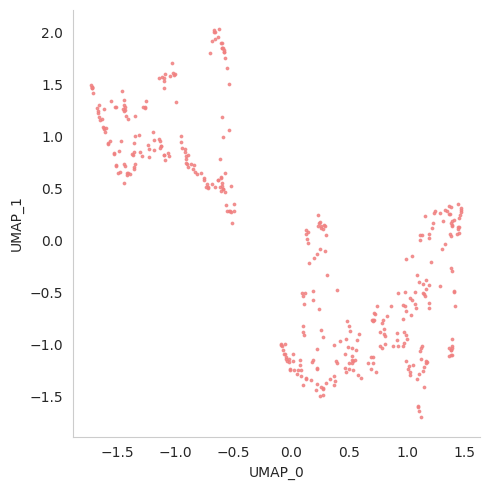

In [12]:
np.random.seed(42)
umap_emb=feature_clustering(25,0.001,'euclidean',data,True)

In [13]:
from fdc.clustering import Clustering

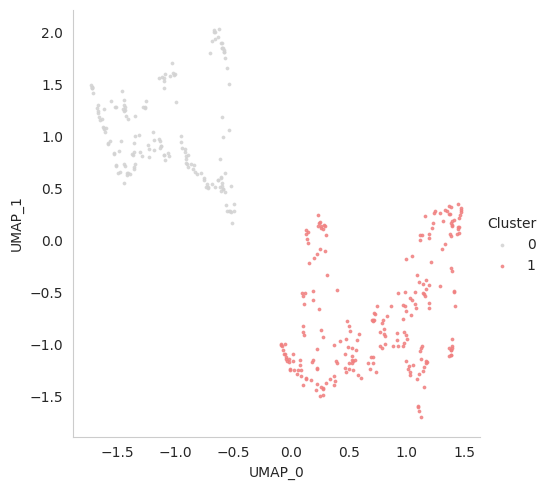

In [14]:
np.random.seed(42)
umap_clustering=Clustering(umap_emb,umap_emb,True)
umap_cluster_list,umap_cluster_counts=umap_clustering.K_means(2)

### Feature-type Distributed Clustering (FDC)

In [15]:
cont_list=['Age']

ord_list=['Duration','Frequency','Intensity','Visual','Nausea', 'Vomit']

nom_list=['Location','Character','Dysphasia', 'Vertigo', 'Tinnitus','Sensory','Phonophobia','Photophobia', 'Hypoacusis', 'Diplopia', 'Defect','Conscience', 'Paresthesia', 'DPF']


FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 2.14191 / 2.142s
FDC.normalize (clustering ORD): 2.17718 / 4.319s
FDC.normalize (clustering NOM): 2.77567 / 7.095s
FDC.normalize (concat): 0.00007 / 7.095s
FDC.normalize (umap 5 -> 2): 1.10231 / 8.197s
FDC.normalize (array -> DataFrame): 0.00027 / 8.197s


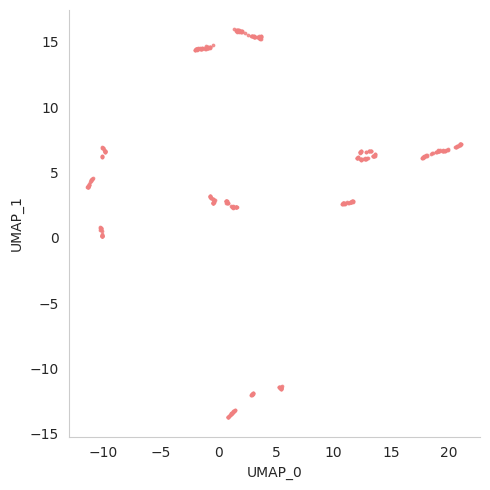

FDC.normalize (plotting): 0.40609 / 8.604s
FDC.normalize (array -> DataFrame): 0.00047 / 8.604s
FDC.normalize (total): 0.00001 / 8.604s


In [16]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)

fdc = FDC(clustering_cont=Clustering('euclidean',25,0.01)
          , clustering_ord=Clustering(canberra_modified,25,0.01)
          , clustering_nom=Clustering('hamming',25,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(data,cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

### Clustering using K-means

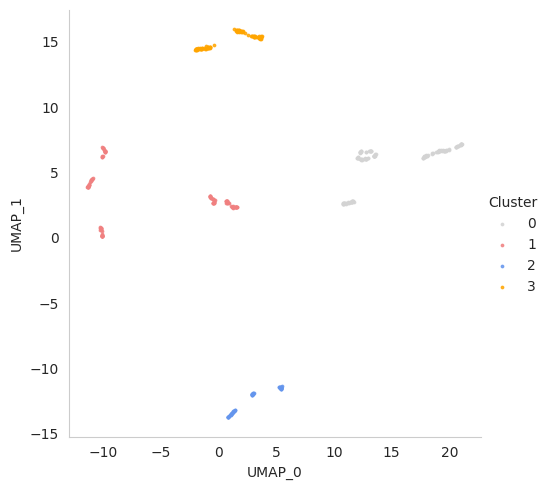

In [17]:
from fdc.clustering import *
np.random.seed(42)
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

In [18]:
cluster_counts

array([137, 114,  56,  93])

### Concatinating cluster labels as Target to original data

In [19]:
data["Target"]=cluster_list

In [20]:
data

,Age,Duration,Frequency,Intensity,Visual,Nausea,Vomit,Location,Character,Dysphasia,...,Sensory,Phonophobia,Photophobia,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF,Target
209,31,1,1,3,1,1,1,1,1,0,...,0,1,1,0,0,0,0,0,1,0
280,22,1,1,2,2,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,3
33,48,2,4,3,0,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,1
210,49,1,1,3,2,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,2
93,52,1,2,2,3,1,0,1,1,0,...,2,1,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,17,1,1,3,2,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,3
106,21,1,1,2,2,1,1,1,1,0,...,2,1,1,0,0,0,0,0,0,3
270,26,1,1,3,3,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,3
348,20,2,2,1,1,1,0,1,1,0,...,0,1,1,0,0,0,0,0,1,0


### Train-val split

In [21]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(np.array(data.drop(["Target"],axis=1)), np.array(cluster_list), test_size = 0.25, random_state = 42)

### Gradient boosting classifier for original traing data (Model-1)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)
model_1 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


In [23]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(model_1, train_features, train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.85       0.98333333 0.95       0.95       0.88333333]
Avg : 0.9233333333333335


In [24]:
model_1.fit(train_features,  train_labels)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Preparing training data for synthetic data generation

In [25]:
train_features=pd.DataFrame(train_features)

In [26]:
train_features["Target"]=train_labels

In [27]:
values=['Age','Duration','Frequency','Intensity','Visual','Nausea', 'Vomit','Location','Character','Dysphasia', 'Vertigo', 'Tinnitus','Sensory','Phonophobia','Photophobia', 'Hypoacusis', 'Diplopia', 'Defect','Conscience', 'Paresthesia', 'DPF', 'Target']

In [28]:
train_features.to_csv('Migraine_training_data(semi_sup).csv',index=False)

In [29]:
hold_out_data=pd.DataFrame(test_features)
hold_out_data['Target']=test_labels
hold_out_data.columns=values
hold_out_data.to_csv('Migraine_hold_out__data(semi_sup).csv',index=False)

In [30]:
dicts = {}
for i in range(len(values)):
        dicts[values[i]]=i


In [31]:
train_features.rename(columns=dicts,inplace=True)


In [32]:
train_features

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,35,1,1,2,2,1,1,1,1,0,...,1,1,1,0,0,0,0,0,1,0
1,25,1,1,2,2,1,1,1,1,0,...,0,1,1,0,0,0,0,0,1,0
2,33,1,2,3,0,1,0,1,1,0,...,2,1,1,0,0,0,0,0,0,2
3,24,1,1,0,4,1,1,0,0,0,...,2,1,1,0,0,0,0,0,1,1
4,21,1,2,3,1,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,30,1,5,3,1,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,1
296,20,3,8,3,0,1,1,1,1,0,...,0,1,1,0,0,0,0,0,0,1
297,16,3,5,3,0,1,1,1,1,0,...,0,1,1,0,0,0,0,0,0,1
298,19,2,1,3,1,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,3


## NextConvGen

### FDC for searcing neighbors for synthetic data generation

In [33]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
fdc = FDC()
fdc.ord_list=list(range(data.shape[1]))[1:7]
fdc.nom_list = list(range(data.shape[1]))[7:]
fdc.cont_list =list(range(data.shape[1]))[:1]

In [34]:
train_features=np.array(train_features)

### Preapring and training NextConvGen model

In [35]:
gen = NextConvGeN(train_features.shape[1], neb=5, fdc=fdc)

In [36]:
gen.reset(train_features)

2023-05-11 10:16:25.817473: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-11 10:16:25.817490: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-11 10:16:25.817503: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (f61d203ff696): /proc/driver/nvidia/version does not exist
2023-05-11 10:16:25.817640: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
gen.train(train_features)

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 2.01694 / 2.017s
FDC.normalize (clustering ORD): 1.50771 / 3.525s
FDC.normalize (clustering NOM): 2.07980 / 5.604s
FDC.normalize (concat): 0.00007 / 5.605s
FDC.normalize (total): 0.00001 / 5.605s
|N| = (300, 5)
|D| = (300, 22)


### Generating 1000 synthetic points and randomly selecting the same legth of original training points for evaluation

In [38]:
from fdc.NN_models import *
np.random.seed(42)
syn_train_data = syn_data_gen(gen,1000,values)

In [39]:
def balanced_synthetic_data(org_data,syn_data):
    import math
    org_data_len = org_data.shape[0]
    class_counts = org_data.iloc[:,-1].value_counts()
    column_names = list( syn_data.columns)
    df_list=[]
    for i in range(len(class_counts)):
        m = len(syn_data[syn_data['Target']==i])

        if m < class_counts[i]:
            run=math.ceil(class_counts[i]/m)
            syn_data = syn_data_gen(gen,org_data_len*run,values)
        c_i=syn_data[syn_data['Target']==i].sample(n=int(class_counts[i]),axis=0,random_state=42)
        df_list.append(c_i)
    balanced_df=pd.concat(df_list,names=column_names)
    return balanced_df

In [40]:
syn_train_data=balanced_synthetic_data(pd.DataFrame(train_features),syn_train_data)

In [41]:
syn_train_data['Target'].value_counts()

0.0    106
1.0     85
3.0     71
2.0     38
Name: Target, dtype: int64

In [42]:
syn_train_data.to_csv('Migraine_NextConvGen_syn_data.csv',index=False)

In [43]:
np.random.seed(42)
syn_train_data=syn_train_data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(np.shape(syn_train_data)[0])]

syn_train_data.set_index(pd.Series(i), inplace=True)

In [44]:
syn_train_data

,Age,Duration,Frequency,Intensity,Visual,Nausea,Vomit,Location,Character,Dysphasia,...,Sensory,Phonophobia,Photophobia,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF,Target
0,53.999992,1.0,3.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,29.069387,1.0,3.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,66.511642,1.0,5.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,24.253651,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28.815130,1.0,3.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,49.999992,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296,35.115562,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
297,32.999992,2.0,5.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
298,18.999998,3.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [45]:
def exact_match_score(original_df, synthetic_df):
    original_data=original_df.drop('Target',axis=1,inplace=False)
    synthetic_data=synthetic_df.drop('Target',axis=1,inplace=False)
    n_matches = 0
    repeated=[]
    for i in range(synthetic_data.shape[0]):
        if (original_data == synthetic_data.iloc[i, :]).all(axis=1).any():
            repeated_data=synthetic_data.iloc[i, :]
            repeated.append(repeated_data)
            n_matches += 1    
    print('The number of data points repeated in the synthetic data are',n_matches / synthetic_data.shape[0])
    return pd.DataFrame(repeated)

In [46]:
original_df=pd.read_csv('Migraine_training_data(semi_sup).csv')
original_df.columns=values

In [47]:
exact_match_score(original_df,syn_train_data)

The number of data points repeated in the synthetic data are 0.01


,Age,Duration,Frequency,Intensity,Visual,Nausea,Vomit,Location,Character,Dysphasia,...,Tinnitus,Sensory,Phonophobia,Photophobia,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF
102,24.0,1.0,1.0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
145,19.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
283,19.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
len(syn_train_data[syn_train_data.duplicated(keep=False)])

18

### Train test split on synthetic data

In [49]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(syn_train_data.drop(["Target"],axis=1)), np.array(syn_train_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on NextConvGen generated synthetic training data  (Model-2)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
NextConvGen_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross Validation

In [51]:
score_lr=cross_val_score(NextConvGen_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.95555556 0.93333333 1.         0.95555556 0.93333333]
Avg : 0.9555555555555555


In [52]:
NextConvGen_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [53]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.875
Geometric mean of cluster 0 is 0.8754275592730114
Correctly predicted data points in cluster 0 is 90.32258064516128%


F1_Score of cluster 1 is 0.9824561403508771
Geometric mean of cluster 1 is 0.982607368881035
Correctly predicted data points in cluster 1 is 96.55172413793103%


F1_Score of cluster 2 is 0.9142857142857143
Geometric mean of cluster 2 is 0.9146591207600471
Correctly predicted data points in cluster 2 is 88.88888888888889%


F1_Score of cluster 3 is 0.9090909090909091
Geometric mean of cluster 3 is 0.9090909090909091
Correctly predicted data points in cluster 3 is 90.9090909090909%


weigted average F1_Score of all clusters is 0.9207337092731829
weighted average Geometric mean of all clusters is 0.9209773220869419
weighted average of Correctly predicted data points in all clusters is 91.99999999999999%


### Case-2: Predicting validation data using Model-2


In [54]:
y=NextConvGen_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.8115942028985507
Geometric mean of cluster 0 is 0.8158031654472909
Correctly predicted data points in cluster 0 is 90.32258064516128%


F1_Score of cluster 1 is 0.9454545454545454
Geometric mean of cluster 1 is 0.9468641529479986
Correctly predicted data points in cluster 1 is 89.65517241379311%


F1_Score of cluster 2 is 0.8888888888888888
Geometric mean of cluster 2 is 0.8888888888888888
Correctly predicted data points in cluster 2 is 88.88888888888889%


F1_Score of cluster 3 is 0.7999999999999999
Geometric mean of cluster 3 is 0.8040302522073697
Correctly predicted data points in cluster 3 is 72.72727272727273%


weigted average F1_Score of all clusters is 0.8617760210803687
weighted average Geometric mean of all clusters is 0.864376241129201
weighted average of Correctly predicted data points in all clusters is 86.0%


### Comparing predicted values from Case-1 & Case-2

In [55]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.9295774647887324
Geometric mean of cluster 0 is 0.9318911162960933
Correctly predicted data points in cluster 0 is 100.0%


F1_Score of cluster 1 is 0.962962962962963
Geometric mean of cluster 1 is 0.9636241116594315
Correctly predicted data points in cluster 1 is 92.85714285714286%


F1_Score of cluster 2 is 0.9714285714285714
Geometric mean of cluster 2 is 0.97182531580755
Correctly predicted data points in cluster 2 is 100.0%


F1_Score of cluster 3 is 0.9
Geometric mean of cluster 3 is 0.9045340337332909
Correctly predicted data points in cluster 3 is 81.81818181818183%


weigted average F1_Score of all clusters is 0.9395330501527686
weighted average Geometric mean of all clusters is 0.9415466107509591
weighted average of Correctly predicted data points in all clusters is 94.0%


### UMAP on synthetic data

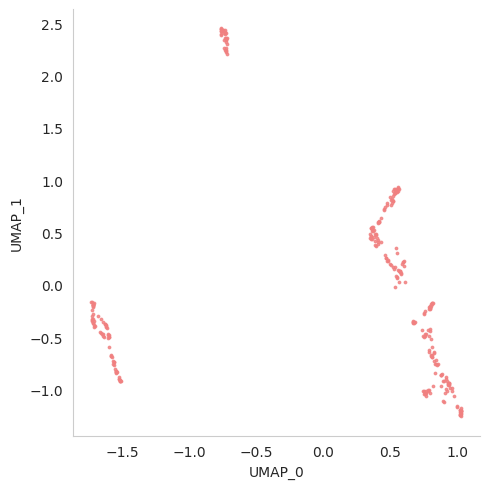

In [56]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(25,0.001,'euclidean',syn_train_data.drop(["Target"],axis=1),True)

### FDC on synthetic data

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 0.98638 / 0.986s
FDC.normalize (clustering ORD): 1.57229 / 2.559s
FDC.normalize (clustering NOM): 2.40273 / 4.961s
FDC.normalize (concat): 0.00007 / 4.961s
FDC.normalize (umap 5 -> 2): 0.98019 / 5.942s
FDC.normalize (array -> DataFrame): 0.00028 / 5.942s


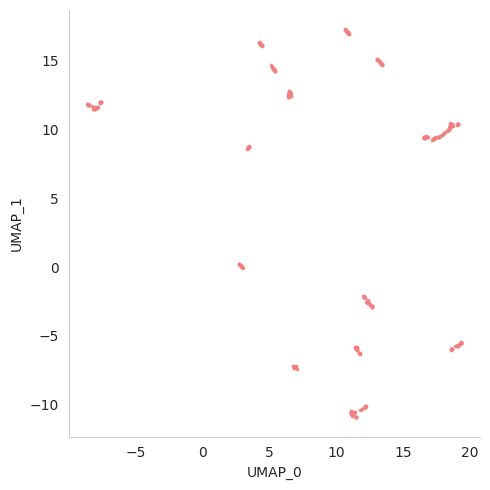

FDC.normalize (plotting): 0.40234 / 6.344s
FDC.normalize (array -> DataFrame): 0.00018 / 6.344s
FDC.normalize (total): 0.00001 / 6.344s


In [57]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',25,0.01)
          , clustering_ord=Clustering(canberra_modified,25,0.01)
          , clustering_nom=Clustering('hamming',25,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(syn_train_data.drop(["Target"],axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

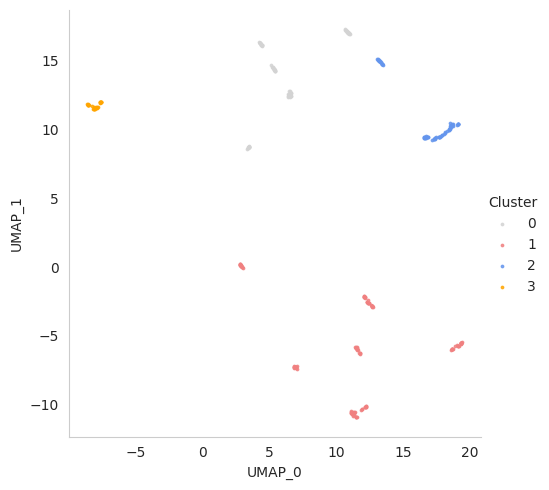

In [58]:
from fdc.clustering import *
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

In [59]:
cluster_counts

array([ 71, 126,  74,  29])

## CTGAN

In [60]:
train_features= pd.DataFrame(train_features)

In [61]:
dicts = {}
for i in range(len(values)):
        dicts[i]=values[i]


In [62]:
train_features.rename(columns=dicts,inplace=True)


In [63]:
from sdv.tabular import CTGAN

In [64]:
gen=CTGAN()

In [65]:
gen.fit(train_features)

### Generating 1000 synthetic points and randomly selecting the same legth of original training points for evaluation

In [66]:
syn_train_data= gen.sample(num_rows=1000)

In [67]:
from fdc.NN_models import *
CTGAN_syn_data=balanced_synthetic_data_CTGAN(train_features,syn_train_data,gen)

In [68]:
CTGAN_syn_data.to_csv('Migraine_CTGAN_syn_data.csv',index=False)

In [69]:
np.random.seed(42)
CTGAN_syn_data=CTGAN_syn_data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(np.shape(CTGAN_syn_data)[0])]

CTGAN_syn_data.set_index(pd.Series(i), inplace=True)

In [70]:
exact_match_score(original_df,CTGAN_syn_data)

The number of data points repeated in the synthetic data are 0.013333333333333334


,Age,Duration,Frequency,Intensity,Visual,Nausea,Vomit,Location,Character,Dysphasia,...,Tinnitus,Sensory,Phonophobia,Photophobia,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF
48,19,1,2,2,2,1,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
78,29,1,1,3,1,1,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0
165,23,1,1,2,2,1,0,1,1,0,...,0,1,1,1,0,0,0,0,0,0
219,25,1,1,3,2,1,0,1,1,0,...,0,0,1,1,0,0,0,0,0,0


In [71]:
len(CTGAN_syn_data[CTGAN_syn_data.duplicated(keep=False)])

0

### Train-test split on CTGAN generated synthetic data points

In [72]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(CTGAN_syn_data.drop(["Target"],axis=1)), np.array(CTGAN_syn_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on CTGAN generated synthetic training data  (Model-2)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
CTGAN_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross validation

In [74]:
score_lr=cross_val_score(CTGAN_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.22222222 0.24444444 0.15555556 0.26666667 0.22222222]
Avg : 0.22222222222222224


In [75]:
CTGAN_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [76]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.875
Geometric mean of cluster 0 is 0.8754275592730114
Correctly predicted data points in cluster 0 is 90.32258064516128%


F1_Score of cluster 1 is 0.9824561403508771
Geometric mean of cluster 1 is 0.982607368881035
Correctly predicted data points in cluster 1 is 96.55172413793103%


F1_Score of cluster 2 is 0.9142857142857143
Geometric mean of cluster 2 is 0.9146591207600471
Correctly predicted data points in cluster 2 is 88.88888888888889%


F1_Score of cluster 3 is 0.9090909090909091
Geometric mean of cluster 3 is 0.9090909090909091
Correctly predicted data points in cluster 3 is 90.9090909090909%


weigted average F1_Score of all clusters is 0.9207337092731829
weighted average Geometric mean of all clusters is 0.9209773220869419
weighted average of Correctly predicted data points in all clusters is 91.99999999999999%


### Case-2: predicting validation data using Model-2


In [77]:
y=CTGAN_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.2702702702702703
Geometric mean of cluster 0 is 0.27389551783238836
Correctly predicted data points in cluster 0 is 32.25806451612903%


F1_Score of cluster 1 is 0.0
Geometric mean of cluster 1 is 0.0
Correctly predicted data points in cluster 1 is 0.0%


F1_Score of cluster 2 is 0.11764705882352942
Geometric mean of cluster 2 is 0.12309149097933274
Correctly predicted data points in cluster 2 is 16.666666666666664%


F1_Score of cluster 3 is 0.20512820512820512
Geometric mean of cluster 3 is 0.20683507599800766
Correctly predicted data points in cluster 3 is 18.181818181818183%


weigted average F1_Score of all clusters is 0.1500884595002242
weighted average Geometric mean of all clusters is 0.15256779562388195
weighted average of Correctly predicted data points in all clusters is 17.0%


### Comparing predicted values from Case-1 & Case-2

In [78]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.23684210526315788
Geometric mean of cluster 0 is 0.2389193429408545
Correctly predicted data points in cluster 0 is 27.27272727272727%


F1_Score of cluster 1 is 0.0
Geometric mean of cluster 1 is 0.0
Correctly predicted data points in cluster 1 is 0.0%


F1_Score of cluster 2 is 0.04
Geometric mean of cluster 2 is 0.04222003309207491
Correctly predicted data points in cluster 2 is 5.88235294117647%


F1_Score of cluster 3 is 0.25641025641025644
Geometric mean of cluster 3 is 0.2585438449975096
Correctly predicted data points in cluster 3 is 22.727272727272727%


weigted average F1_Score of all clusters is 0.14136815114709853
weighted average Geometric mean of all clusters is 0.14290043469558683
weighted average of Correctly predicted data points in all clusters is 15.0%


### UMAP on CTGAN synthetic data

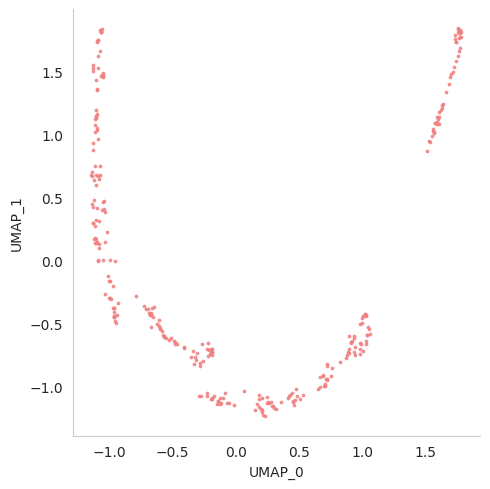

In [79]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(20,0.001,'euclidean',CTGAN_syn_data.drop(["Target"],axis=1),True)

### FDC on CTGAN synthetic data

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 1.40102 / 1.401s
FDC.normalize (clustering ORD): 1.38660 / 2.788s
FDC.normalize (clustering NOM): 2.00138 / 4.789s
FDC.normalize (concat): 0.00007 / 4.789s
FDC.normalize (umap 5 -> 2): 1.12368 / 5.913s
FDC.normalize (array -> DataFrame): 0.00027 / 5.913s


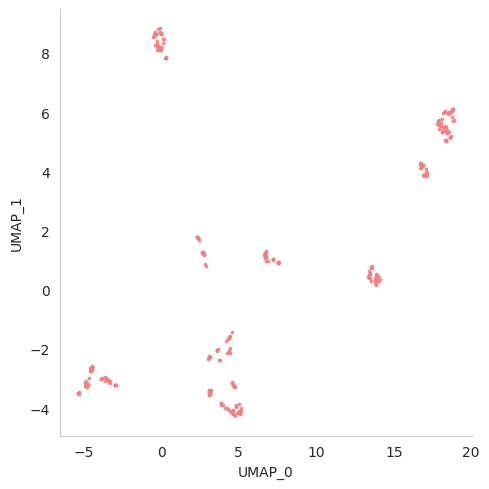

FDC.normalize (plotting): 0.39984 / 6.313s
FDC.normalize (array -> DataFrame): 0.00017 / 6.313s
FDC.normalize (total): 0.00001 / 6.313s


In [80]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',25,0.01)
          , clustering_ord=Clustering(canberra_modified,25,0.01)
          , clustering_nom=Clustering('hamming',25,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(CTGAN_syn_data.drop(["Target"],axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

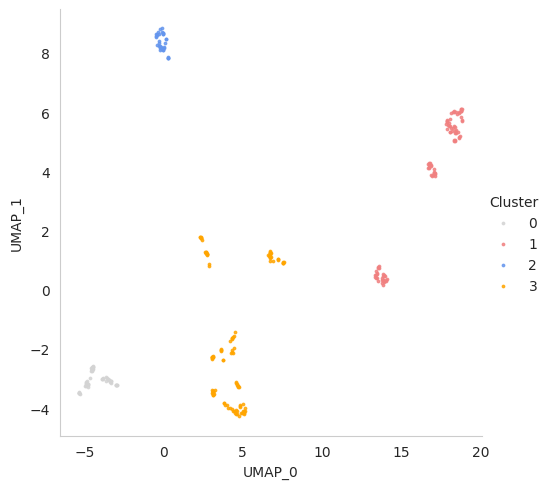

In [81]:
from fdc.clustering import *
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

## CTABGAN

train_features= pd.DataFrame(train_features)

dicts = {}
for i in range(len(values)):
        dicts[i]=values[i]


train_features.rename(columns=dicts,inplace=True)


In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from library.generators.ctab import CtabGan

In [83]:
gen=CtabGan()

In [84]:
gen.reset(train_features)

In [85]:
gen.train(train_features)

100%|██████████| 10/10 [00:10<00:00,  1.09s/it]


### Generating 1000 synthetic points and randomly selecting the same legth of original training points for evaluation

In [86]:
CTABGAN_syn_data= gen.generateData(1000)

In [87]:
CTABGAN_syn_data=pd.DataFrame(CTABGAN_syn_data)

In [88]:
CTABGAN_syn_data.rename(columns=dicts,inplace=True)

In [89]:
for i in values[1:]:
    CTABGAN_syn_data[i]=abs(np.round(CTABGAN_syn_data[i]))

In [90]:
from fdc.NN_models import *
CTABGAN_syn_data=balanced_synthetic_data_CTGAN(train_features,CTABGAN_syn_data,gen)

In [91]:
CTABGAN_syn_data.to_csv('Migraine_CTABGAN_syn_data.csv',index=False)

In [92]:
np.random.seed(42)
CTABGAN_syn_data=CTABGAN_syn_data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(np.shape(CTABGAN_syn_data)[0])]

CTABGAN_syn_data.set_index(pd.Series(i), inplace=True)

In [93]:
exact_match_score(original_df,CTABGAN_syn_data)

The number of data points repeated in the synthetic data are 0.0


""


In [94]:
len(CTABGAN_syn_data[CTABGAN_syn_data.duplicated(keep=False)])

0

### Train-test split on CTABGAN generated synthetic data points

In [95]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(CTABGAN_syn_data.drop(["Target"],axis=1)), np.array(CTABGAN_syn_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on CTABGAN generated synthetic training data  (Model-2)

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
CTABGAN_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross validation

In [97]:
score_lr=cross_val_score(CTABGAN_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.17777778 0.15555556 0.22222222 0.13333333 0.28888889]
Avg : 0.19555555555555554


In [98]:
CTABGAN_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [99]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.875
Geometric mean of cluster 0 is 0.8754275592730114
Correctly predicted data points in cluster 0 is 90.32258064516128%


F1_Score of cluster 1 is 0.9824561403508771
Geometric mean of cluster 1 is 0.982607368881035
Correctly predicted data points in cluster 1 is 96.55172413793103%


F1_Score of cluster 2 is 0.9142857142857143
Geometric mean of cluster 2 is 0.9146591207600471
Correctly predicted data points in cluster 2 is 88.88888888888889%


F1_Score of cluster 3 is 0.9090909090909091
Geometric mean of cluster 3 is 0.9090909090909091
Correctly predicted data points in cluster 3 is 90.9090909090909%


weigted average F1_Score of all clusters is 0.9207337092731829
weighted average Geometric mean of all clusters is 0.9209773220869419
weighted average of Correctly predicted data points in all clusters is 91.99999999999999%


### Case-2: predicting validation data using Model-2


In [100]:
y=CTABGAN_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.28571428571428575
Geometric mean of cluster 0 is 0.28575028575042866
Correctly predicted data points in cluster 0 is 29.03225806451613%


F1_Score of cluster 1 is 0.18604651162790697
Geometric mean of cluster 1 is 0.19851666679418606
Correctly predicted data points in cluster 1 is 13.793103448275861%


F1_Score of cluster 2 is 0.39999999999999997
Geometric mean of cluster 2 is 0.4001633653325206
Correctly predicted data points in cluster 2 is 38.88888888888889%


F1_Score of cluster 3 is 0.03389830508474577
Geometric mean of cluster 3 is 0.03504998186163908
Correctly predicted data points in cluster 3 is 4.545454545454546%


weigted average F1_Score of all clusters is 0.22198254406216567
weighted average Geometric mean of all clusters is 0.22589282372236114
weighted average of Correctly predicted data points in all clusters is 21.0%


### Comparing predicted values from Case-1 & Case-2

In [101]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.3076923076923077
Geometric mean of cluster 0 is 0.30772872744833185
Correctly predicted data points in cluster 0 is 30.303030303030305%


F1_Score of cluster 1 is 0.14285714285714285
Geometric mean of cluster 1 is 0.1515228816828316
Correctly predicted data points in cluster 1 is 10.714285714285714%


F1_Score of cluster 2 is 0.4117647058823529
Geometric mean of cluster 2 is 0.4117647058823529
Correctly predicted data points in cluster 2 is 41.17647058823529%


F1_Score of cluster 3 is 0.06779661016949154
Geometric mean of cluster 3 is 0.07009996372327816
Correctly predicted data points in cluster 3 is 9.090909090909092%


weigted average F1_Score of all clusters is 0.22645371577574971
weighted average Geometric mean of all clusters is 0.22939887894826358
weighted average of Correctly predicted data points in all clusters is 22.0%


### UMAP on CTABGAN synthetic data

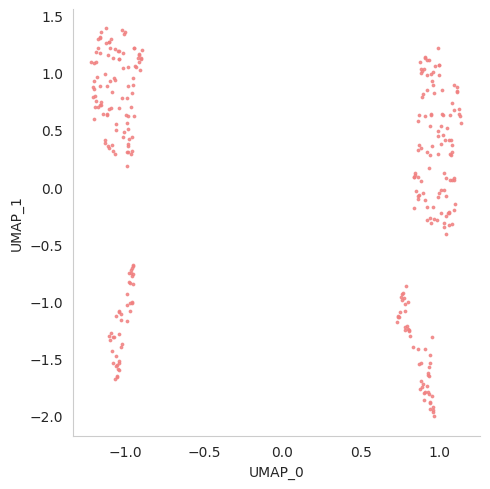

In [102]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(20,0.001,'euclidean',CTABGAN_syn_data.drop(["Target"],axis=1),True)

### FDC on CTABGAN synthetic data

FDC.normalize (init): 0.00002 / 0.000s
FDC.normalize (clustering CONT): 0.97898 / 0.979s
FDC.normalize (clustering ORD): 0.95580 / 1.935s
FDC.normalize (clustering NOM): 1.13602 / 3.071s
FDC.normalize (concat): 0.00007 / 3.071s
FDC.normalize (umap 5 -> 2): 0.99636 / 4.067s
FDC.normalize (array -> DataFrame): 0.00026 / 4.068s


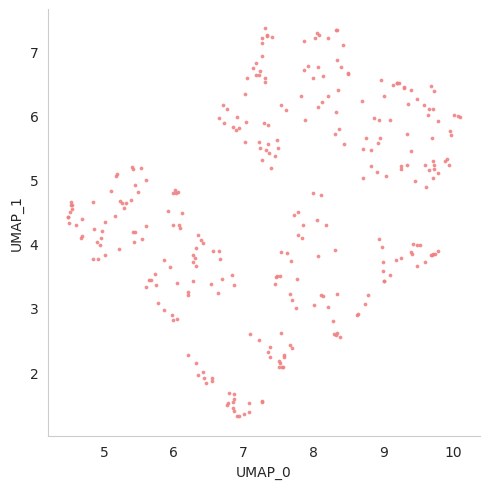

FDC.normalize (plotting): 0.40367 / 4.471s
FDC.normalize (array -> DataFrame): 0.00018 / 4.471s
FDC.normalize (total): 0.00001 / 4.471s


In [103]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',25,0.01)
          , clustering_ord=Clustering(canberra_modified,25,0.01)
          , clustering_nom=Clustering('hamming',25,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(CTABGAN_syn_data.drop(["Target"],axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

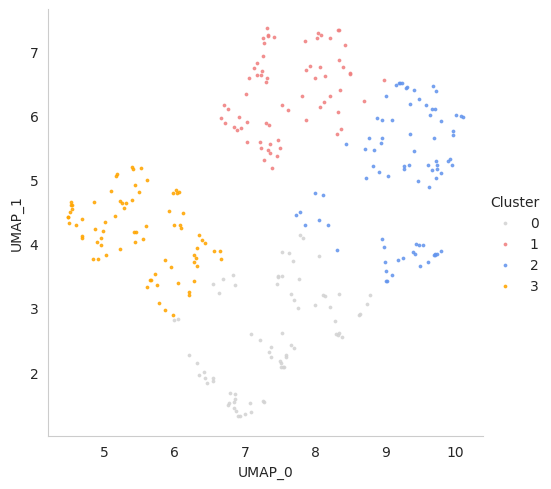

In [104]:
from fdc.clustering import *
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

### Tabddpm

In [105]:

Tabddpm_syn_data=pd.read_csv('Migraine_synth_data_semi_tddpm.csv')
Tabddpm_syn_data.drop(['Unnamed: 0'],axis=1,inplace=True)



In [106]:
Tabddpm_syn_data['Target'].value_counts()

0    658
1    574
3    480
2    288
Name: Target, dtype: int64

In [107]:
def balanced_synthetic_data(org_data,syn_data):
    import math
    org_data_len = org_data.shape[0]
    class_counts = org_data.iloc[:,-1].value_counts()
    column_names = list( syn_data.columns)
    df_list=[]
    for i in range(len(class_counts)):
        c_i=syn_data[syn_data['Target']==i].sample(n=int(class_counts[i]),axis=0,random_state=42)
        df_list.append(c_i)
    balanced_df=pd.concat(df_list,names=column_names)
    return balanced_df

In [108]:
Tabddpm_syn_data=balanced_synthetic_data(pd.DataFrame(train_features),Tabddpm_syn_data)

In [109]:
Tabddpm_syn_data['Target'].value_counts()

0    106
1     85
3     71
2     38
Name: Target, dtype: int64

In [110]:
Tabddpm_syn_data.to_csv('Migraine_Tabddpm_syn_data(semi_sup).csv',index=False)

In [111]:
np.random.seed(42)
Tabddpm_syn_data=Tabddpm_syn_data.sample(frac=1) #Shuffle the data set
np.random.seed(42)
i=[x for x in range(np.shape(Tabddpm_syn_data)[0])]

Tabddpm_syn_data.set_index(pd.Series(i), inplace=True)

In [112]:
Tabddpm_syn_data

,Age,Duration,Frequency,Intensity,Visual,Nausea,Vomit,Location,Character,Dysphasia,...,Sensory,Phonophobia,Photophobia,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF,Target
0,38.376574,1,2,3,2,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,2
1,28.958235,1,1,3,2,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,3
2,49.888851,1,5,2,1,1,0,1,1,0,...,1,1,1,0,0,0,0,0,0,1
3,50.356217,3,1,2,2,1,0,1,1,0,...,1,1,1,0,0,0,0,0,1,0
4,29.005870,1,1,3,1,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,54.741908,1,5,3,0,1,1,1,1,0,...,0,1,1,0,0,0,0,0,1,1
296,35.025700,2,1,2,0,1,0,1,1,0,...,1,1,1,0,0,0,0,0,0,0
297,50.638470,1,5,2,2,1,1,1,1,0,...,2,1,1,0,0,0,0,0,1,1
298,19.592787,1,3,2,2,1,0,1,1,0,...,0,1,1,0,0,0,0,0,0,3


In [113]:
exact_match_score(original_df,Tabddpm_syn_data)

The number of data points repeated in the synthetic data are 0.013333333333333334


,Age,Duration,Frequency,Intensity,Visual,Nausea,Vomit,Location,Character,Dysphasia,...,Tinnitus,Sensory,Phonophobia,Photophobia,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF
8,15.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
81,69.0,1.0,5.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
111,15.0,2.0,2.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
215,15.0,2.0,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
len(Tabddpm_syn_data[Tabddpm_syn_data.duplicated(keep=False)])

2

### Train test split on synthetic data

In [115]:
syn_train_features, syn_test_features, syn_train_labels, syn_test_labels = train_test_split(np.array(Tabddpm_syn_data.drop(["Target"],axis=1)), np.array(Tabddpm_syn_data["Target"]), test_size = 0.25, random_state = 42)

### Gradient boosting classifier on Tabddpm generated synthetic training data  (Model-2)

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
tabddpm_model_2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=42)


### 5 Fold Cross Validation

In [117]:
score_lr=cross_val_score(tabddpm_model_2, syn_train_features, syn_train_labels,cv=5)
print(score_lr)
print("Avg :",np.average(score_lr))


[0.91111111 0.95555556 0.95555556 0.97777778 0.95555556]
Avg : 0.9511111111111111


In [118]:
tabddpm_model_2.fit(syn_train_features,syn_train_labels )

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=42)

### Case-1: predicting validation data using Model-1


In [119]:
x=model_1.predict(np.array(test_features))
cluster_wise_F1score(list(test_labels),list(x))

F1_Score of cluster 0 is 0.875
Geometric mean of cluster 0 is 0.8754275592730114
Correctly predicted data points in cluster 0 is 90.32258064516128%


F1_Score of cluster 1 is 0.9824561403508771
Geometric mean of cluster 1 is 0.982607368881035
Correctly predicted data points in cluster 1 is 96.55172413793103%


F1_Score of cluster 2 is 0.9142857142857143
Geometric mean of cluster 2 is 0.9146591207600471
Correctly predicted data points in cluster 2 is 88.88888888888889%


F1_Score of cluster 3 is 0.9090909090909091
Geometric mean of cluster 3 is 0.9090909090909091
Correctly predicted data points in cluster 3 is 90.9090909090909%


weigted average F1_Score of all clusters is 0.9207337092731829
weighted average Geometric mean of all clusters is 0.9209773220869419
weighted average of Correctly predicted data points in all clusters is 91.99999999999999%


### Case-2: Predicting validation data using Model-2


In [120]:
y=tabddpm_model_2.predict(np.array(test_features))

cluster_wise_F1score(list(test_labels),list(y))

F1_Score of cluster 0 is 0.8923076923076922
Geometric mean of cluster 0 is 0.8932596002688612
Correctly predicted data points in cluster 0 is 93.54838709677419%


F1_Score of cluster 1 is 1.0
Geometric mean of cluster 1 is 1.0
Correctly predicted data points in cluster 1 is 100.0%


F1_Score of cluster 2 is 0.9142857142857143
Geometric mean of cluster 2 is 0.9146591207600471
Correctly predicted data points in cluster 2 is 88.88888888888889%


F1_Score of cluster 3 is 0.9047619047619048
Geometric mean of cluster 3 is 0.9057894597833127
Correctly predicted data points in cluster 3 is 86.36363636363636%


weigted average F1_Score of all clusters is 0.9302344322344321
weighted average Geometric mean of all clusters is 0.9308227989724842
weighted average of Correctly predicted data points in all clusters is 93.0%


### Comparing predicted values from Case-1 & Case-2

In [121]:
cluster_wise_F1score(list(x),list(y))

F1_Score of cluster 0 is 0.9253731343283583
Geometric mean of cluster 0 is 0.9254762227411248
Correctly predicted data points in cluster 0 is 93.93939393939394%


F1_Score of cluster 1 is 0.9824561403508771
Geometric mean of cluster 1 is 0.982607368881035
Correctly predicted data points in cluster 1 is 100.0%


F1_Score of cluster 2 is 0.9411764705882353
Geometric mean of cluster 2 is 0.9411764705882353
Correctly predicted data points in cluster 2 is 94.11764705882352%


F1_Score of cluster 3 is 0.9523809523809523
Geometric mean of cluster 3 is 0.9534625892455924
Correctly predicted data points in cluster 3 is 90.9090909090909%


weigted average F1_Score of all clusters is 0.9499846631504134
weighted average Geometric mean of all clusters is 0.9502989864252913
weighted average of Correctly predicted data points in all clusters is 95.0%


### UMAP on synthetic data

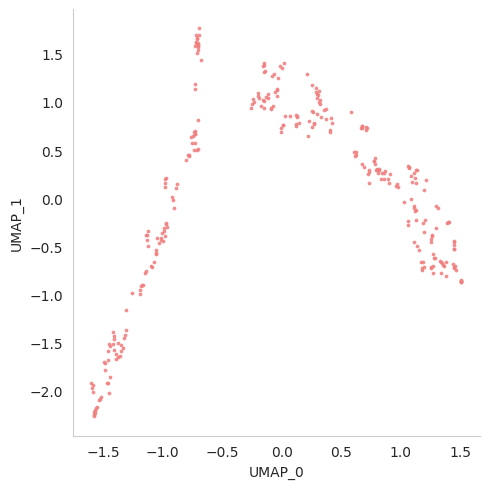

In [122]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC
np.random.seed(42)
syn_emb_low=feature_clustering(25,0.001,'euclidean',Tabddpm_syn_data.drop(["Target"],axis=1),True)

### FDC on synthetic data

FDC.normalize (init): 0.00006 / 0.000s
FDC.normalize (clustering CONT): 0.97924 / 0.979s
FDC.normalize (clustering ORD): 1.71860 / 2.698s
FDC.normalize (clustering NOM): 2.27004 / 4.968s
FDC.normalize (concat): 0.00007 / 4.968s
FDC.normalize (umap 5 -> 2): 0.99229 / 5.960s
FDC.normalize (array -> DataFrame): 0.00030 / 5.961s


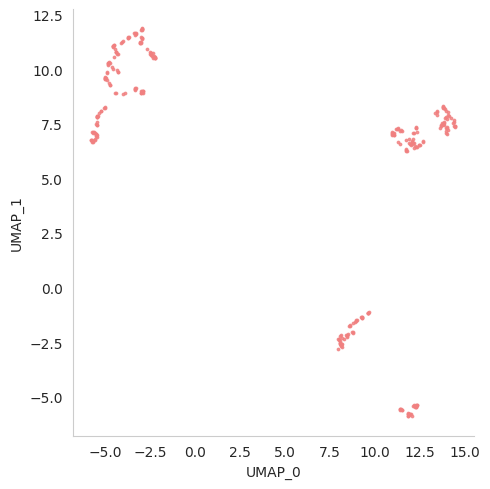

FDC.normalize (plotting): 0.42415 / 6.385s
FDC.normalize (array -> DataFrame): 0.00019 / 6.385s
FDC.normalize (total): 0.00001 / 6.385s


In [123]:
from fdc.fdc import feature_clustering, canberra_modified, Clustering, FDC

np.random.seed(42)
fdc = FDC(clustering_cont=Clustering('euclidean',25,0.01)
          , clustering_ord=Clustering(canberra_modified,25,0.01)
          , clustering_nom=Clustering('hamming',25,0.01)
          , visual=True
          , use_pandas_output=True
          , with_2d_embedding=True
          )

fdc.selectFeatures(continueous=cont_list, nomial=nom_list, ordinal=ord_list)

FDC_emb_high,FDC_emb_low = fdc.normalize(Tabddpm_syn_data.drop(["Target"],axis=1),cont_list=cont_list, nom_list=nom_list, ord_list=ord_list,
                  with_2d_embedding=True,
                  visual=True)

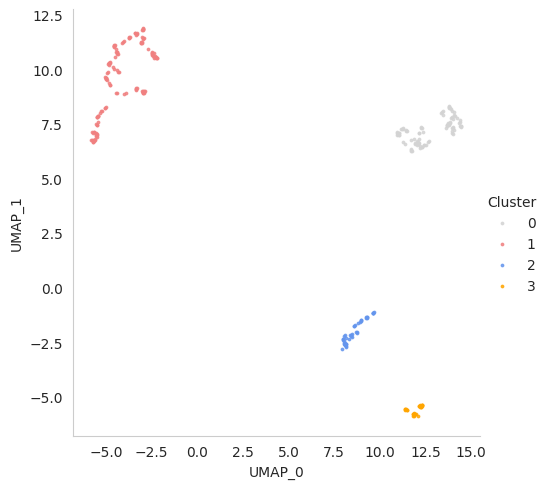

In [124]:
from fdc.clustering import *
clustering=Clustering(FDC_emb_low,FDC_emb_low,True)
cluster_list,cluster_counts=clustering.K_means(4)

In [125]:
cluster_counts

array([ 91, 134,  46,  29])